# Benefits of MPL Modeling for Actuator Selection - Random Graph analysis

Statistics on the benefits of multiplicative noise modelling for actuator selection over N realizations of Erdos-Renyi (ER) or Barabasi-Albert (BA) random graphs

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
# %matplotlib widget

from functionfile_system_definition import create_graph, system_package
from functionfile_system_mplcost import random_graph_empirical_simulation, plot_random_graph_simulation, plot_random_graph_simulation2

### Test Parameters

N_test: number of realizations

Network_type
- ER for Erdos-Renyi with network parameter for edge probability
- BA for Barabasi-Albert with network parameter for initial network size

System parameters
- nx: number of nodes in the network
- rho: stability scaling - sets $|\lambda_{\max}|$ of open-loop dynamics
- alphai: covariance of state-dependent multiplicative noise - assumed constant across all MPL matrices $A_i$
- X0_cov: covariance of initial state vector
- X0_mean: mean of initial state vector

In [2]:
# Number of test iterations
N_test = 10

# Network type and parameter
# For type='ER': Parameter = edge probability
# For type='BA': Parameter = initial network size
Network_type = 'ER'
Network_parameter = 0.2

# System parameters
nx = 10           # Number of nodes
rho = 0.8        # Open-loop stability (unsigned magnitude of largest eigenvalue of dynamics matrix)
alphai = [0.1]    # Covariance on state-dependent multiplicative noise

# Initial state - realization of distribution given mean and covariance 
X0_cov = 10*np.identity(nx)
X0_mean = np.zeros(nx)

### Code

In [3]:
X0 = np.random.default_rng().multivariate_normal(mean=X0_mean, cov=X0_cov)
S_base_model = system_package(A_in=rho*create_graph(nx)['A'], alphai_in=alphai, Ai_in=create_graph(nx)['A'], X0_in=X0, label_in='System Model', print_check=False)

In [4]:
simulation_values = random_graph_empirical_simulation(S_base_model, Network_parameter, Network_type, N_test)

Simulation start: Empirical study of random graphs
ER model
Realization: 1 / 10
Simulation start: Comparison of actuator selection of A vs B on C
Simulation end: Comparison of actuator selection of A vs B on C
Realization: 2 / 10
Simulation start: Comparison of actuator selection of A vs B on C
Simulation end: Comparison of actuator selection of A vs B on C
Realization: 3 / 10
Simulation start: Comparison of actuator selection of A vs B on C
Simulation end: Comparison of actuator selection of A vs B on C
Realization: 4 / 10
Simulation start: Comparison of actuator selection of A vs B on C
Simulation end: Comparison of actuator selection of A vs B on C
Realization: 5 / 10
Simulation start: Comparison of actuator selection of A vs B on C
====> Breaking current simulation at t= 48 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 71 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 85 as cumulative cost magnitude exceed 1e+08

### Plot

File saved as: images/MPL_10_ER_0.2_10_Comp1.pdf


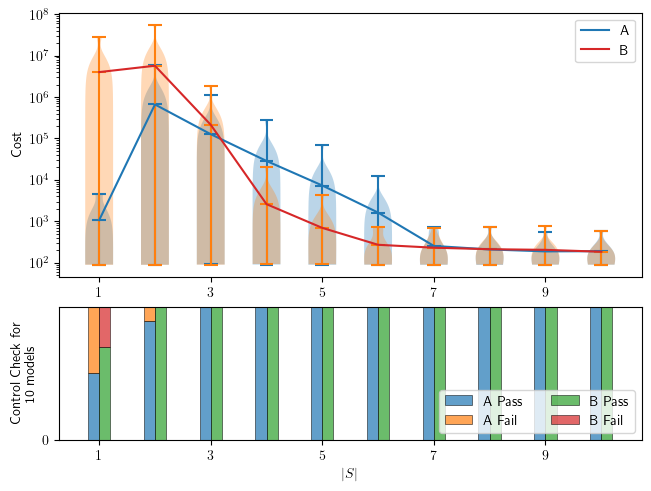

In [5]:
plot_random_graph_simulation(simulation_values)

File saved as: images/MPL_10_ER_0.2_10_Comp2.pdf


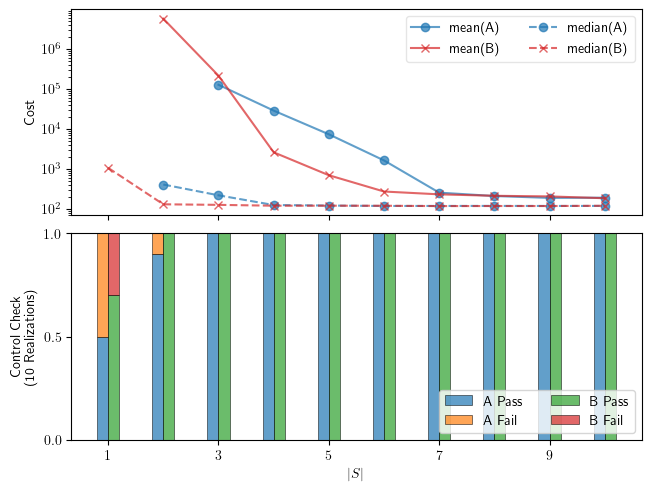

In [6]:
plot_random_graph_simulation2(simulation_values)

## Run Complete

In [7]:
print('Run Complete')

Run Complete
